In [13]:
# Data Manipulation 
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

#mission: predict if the client will subscribe (yes/no) a term deposit (variable y).
# Load Training and Test Data Sets
headers = ['age', 'job', 'marital', 
           'education', 'default', 
           'housing', 'loan', 
           'contact', 'month', 'day_of_week', 
           'duration', 'campaign', 
           'pdays', 'previous', 
           'poutcome','emp.var.rate','cons.price.idx',
           'cons.conf.idx','euribor3m','nr.employed','y']
training_raw = pd.read_csv('/Users/harshita/Desktop/ece143/ece143_direct_marketing/bank-additional/bank-additional.csv', 
                       header=None, 
                       names=headers, 
                       sep=';', 
                       na_values=["?"], 
                       engine='python',
                       skiprows=1,
                       index_col=False)
test_raw = pd.read_csv('/Users/harshita/Desktop/ece143/ece143_direct_marketing/bank-additional/bank-additional.csv', 
                      header=None, 
                      names=headers, 
                      sep=';', 
                      na_values=["?"], 
                      engine='python', 
                      skiprows=1,
                      index_col=False)
# print(training_raw.shape)
# print(test_raw.shape)

In [14]:
# Join Datasets
dataset_raw = training_raw.append(test_raw)
dataset_raw.reset_index(inplace=True)
dataset_raw.drop('index',inplace=True,axis=1)
dataset_raw.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [25]:
number_of_people = dataset_raw.shape[0]

In [51]:
married = dataset_raw.loc[dataset_raw['marital'] == 'married']['y']
m = married.value_counts()
# pd.value_counts()

In [52]:
single = dataset_raw.loc[dataset_raw['marital'] == 'single']['y']
s = single.value_counts()
s

no     1996
yes     310
Name: y, dtype: int64

In [55]:
divorced = dataset_raw.loc[dataset_raw['marital'] == 'divorced']['y']
d = divorced.value_counts()

In [67]:
unknown = dataset_raw.loc[dataset_raw['marital'] == 'unknown']['y']
u = unknown.value_counts()
u

no     20
yes     2
Name: y, dtype: int64

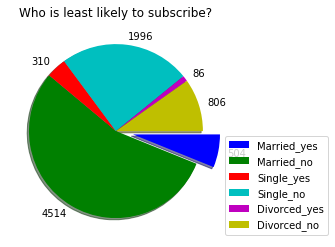

In [69]:
values = [m[1],m[0],s[1],s[0],d[1],d[0] ]
colors = ['b', 'g', 'r', 'c', 'm', 'y']
labels = ['Married_yes', 'Married_no', 'Single_yes', 'Single_no', 'Divorced_yes', 'Divorced_no']
explode = (0.2, 0, 0, 0, 0, 0)
plt.pie(values, colors=colors, labels= values,explode=explode,counterclock=False, shadow=True)
plt.title('Who is least likely to subscribe?')
plt.legend(labels,loc='best', bbox_to_anchor=(1.5, 0.5, 0, 0))
plt.show()

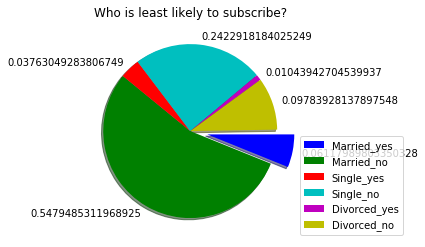

In [59]:
values = [m[1]/number_of_people,m[0]/number_of_people,s[1]/number_of_people,s[0],d[1],d[0]]
colors = ['b', 'g', 'r', 'c', 'm', 'y']
labels = ['Married_yes', 'Married_no', 'Single_yes', 'Single_no', 'Divorced_yes', 'Divorced_no']
explode = (0.2, 0, 0, 0, 0, 0)
plt.pie(values, colors=colors, labels= values,explode=explode,counterclock=False, shadow=True)
plt.title('Who is least likely to subscribe?')
plt.legend(labels,loc='best', bbox_to_anchor=(1.5, 0.5, 0, 0))
plt.show()